### Libraries

In [114]:
# GENERAL LIBRARIES
import os
import pandas as pd
import re
import numpy as np
pd.options.display.float_format = '{:.2f}'.format
import unicodedata
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

# NLTK LIBRARIES
import nltk
from nltk import word_tokenize, pos_tag, pos_tag_sents
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag, ne_chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# TEXTBLOB LIBRARIES
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# SKLEARN LIBRARIES
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thatoi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Thatoi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Thatoi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thatoi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Thatoi\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Thatoi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is alrea

In [5]:
os.chdir(r"C:\important_files")
data = pd.read_csv('iPhone.csv',parse_dates = True)

In [6]:
data.head()

,Unnamed: 0,fullname,html,is_retweet,likes,replies,retweet_id,retweeter_userid,retweeter_username,retweets,text,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username
0,0,Marek Dvořák,"<p class=""TweetTextSize js-tweet-text tweet-te...",0,0,0,nan,nan,nan,0,iDrop News is giving away a free iPhone 11 in ...,2019-10-30 23:59:44,2019-10-30 23:59:44,1189693400834101248,/marekdvorak6666/status/1189693400834101250,1376342479,marekdvorak6666
1,1,Terri,"<p class=""TweetTextSize js-tweet-text tweet-te...",0,0,0,nan,nan,nan,0,I entered @skinit's iPhone 11 Giveaway for a c...,2019-10-30 23:59:40,2019-10-30 23:59:40,1189693383037669376,/AtTheMapleTable/status/1189693383037669379,118994120,AtTheMapleTable
2,2,AuntySuzany,"<p class=""TweetTextSize js-tweet-text tweet-te...",0,0,0,nan,nan,nan,0,Enter for Your Chance to Win an iPhone 11 256G...,2019-10-30 23:59:40,2019-10-30 23:59:40,1189693381200564224,/AuntySuzany/status/1189693381200564224,1056680085904744448,AuntySuzany
3,3,boojay,"<p class=""TweetTextSize js-tweet-text tweet-te...",0,56,1,nan,nan,nan,2,Okay the new iPhone 11 Pro is _really_ good at...,2019-10-30 23:59:37,2019-10-30 23:59:37,1189693371008184320,/bluejay_712/status/1189693371008184320,17113293,bluejay_712
4,4,mucci_thatboi_ed,"<p class=""TweetTextSize js-tweet-text tweet-te...",0,1,1,nan,nan,nan,0,You know it brooo @iPhone11,2019-10-30 23:59:27,2019-10-30 23:59:27,1189693327299489792,/machiya_mucci_/status/1189693327299489793,1023677118411145216,machiya_mucci_


### Data assessment

In [7]:
# converting datetime column to datetime datatype
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [8]:
# record assessment before removing duplicates
print(data['user_id'].nunique())
print(data['tweet_id'].nunique())
print(data['text'].nunique())

11158
15209
14243


In [9]:
# removing duplicate tweets from dataset
new_data=data.drop_duplicates(subset=['text'],keep='first')
print(new_data['user_id'].nunique())
print(new_data['tweet_id'].nunique())
print(new_data['text'].nunique())
print(new_data.shape)

10449
14123
14243
(14243, 17)


### Cleaning with Regex

In [10]:
def preprocessor(text):
    '''
    definition to remove : HTML markups,
    http urls,special characters & emoticons
    and converting into a lowercase
    
    '''
    #substitute HTML markups
    text1 = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    
    #lowecase and join emoticons
    text2 = (re.sub('[\W]+', ' ', text1.lower()) +
            ' '.join(emoticons).replace('-', ''))
    
    #remove https://url
    text3 = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', text2)
    
    #remove line breaks
    text4 = re.sub("\n", "", text3)
    
    #non-ASCII characters
    text5 = re.sub(r'[^\x00-\x7F]+',' ', text4) 
    text6 = re.sub(r'[a-z]*[:.]+\S+','',text5)
    text7 = re.sub(r"[^a-zA-Z0-9]+", ' ',text6)
    
    return text7

In [11]:
# Before cleaning
new_data['text'].iloc[12888]

'My 7th #Watercolor #Art attempt with #iPhone8plus #Morning in #RealTime #NoFilter #NoFilterNeeded #Trees #Country #Grass #Meadow #Countryside #Sun #Photography #Landscape #LandscapePhotography #igers #Nature… https://www.instagram.com/p/B4AcQkPHX7v/?igshid=nott7g6l5gm3\xa0…'

In [12]:
# Clean text
preprocessor(new_data['text'].iloc[12888])

'my 7th watercolor art attempt with iphone8plus morning in realtime nofilter nofilterneeded trees country grass meadow countryside sun photography landscape landscapephotography igers nature https www instagram com p b4acqkphx7v igshid nott7g6l5gm3 '

In [148]:
# Applying cleaning
new_data['cleantext'] = new_data['text'].apply(preprocessor)
data2 = new_data['cleantext']
data2=data2.reset_index()

# Removing unwanted words  : http , www, twitter, com
remove_list = ['http','www','com','twitter']
data2['cleantext'] = data2['cleantext'] .apply(lambda x: " ".join(x for x in x.split() if x not in remove_list))

(14243, 2)


In [ ]:
# Spelling Correction
from autocorrect import spell
data2['correcttext'] = data2['cleantext'].apply(lambda x: " ".join([Speller(i) for i in x.split()]))

In [168]:
# Removing unwanted words  : http , www, twitter, com
remove_list = ['http','www','com','twitter','pic']
data2['correcttext'] = data2['correcttext'] .apply(lambda x: " ".join(x for x in x.split() if x not in remove_list))
data2['correcttext'].iloc[0]

'drop news is giving away a free phone 11 in february enter to win now in nr rmmfks'

### Analysis on Words

In [161]:
# Number of words
data2['num_wds'] = data2['correcttext'].apply(lambda x: len(x.split()))
print('Mean',data2['num_wds'].mean())
print('Min',data2['num_wds'].min())
print('Max',data2['num_wds'].max())

Mean 23.767254089728286
Min 1
Max 109


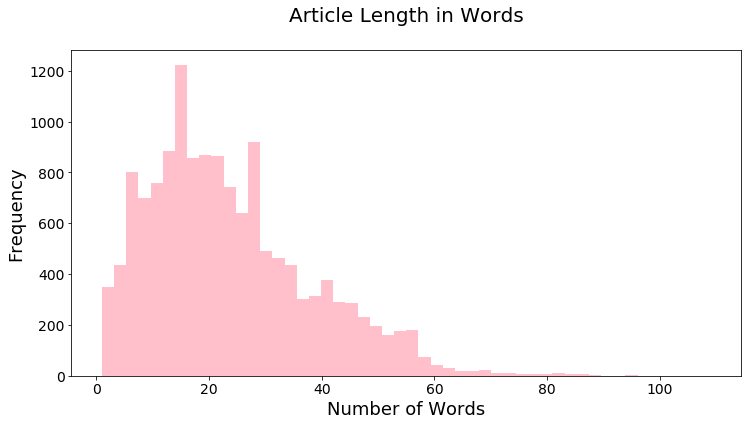

In [162]:
# data with more than 0 words
articles = data2[data2['num_wds']>0]
ax=articles['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,6),color = 'pink')
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);

In [163]:
# Number of unique words
articles['uniq_wds'] = articles['correcttext'].str.split().apply(lambda x: len(set(x)))
articles['uniq_wds'].head()

0    17
1    18
2    25
3    18
4     5
Name: uniq_wds, dtype: int64

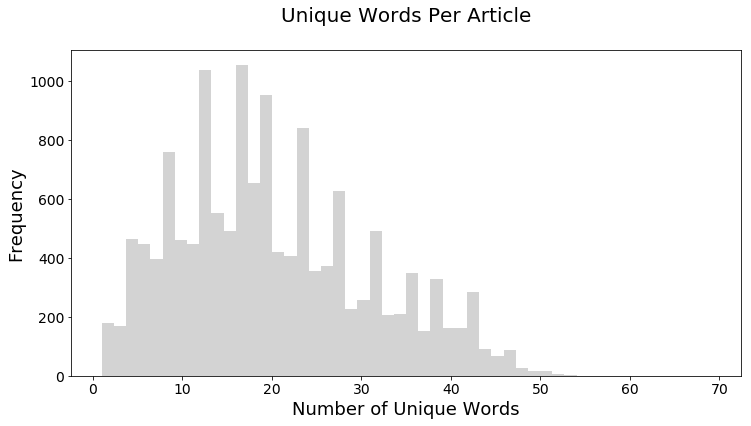

In [164]:
# data with more than 0 words
ax=articles['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,6),color = 'lightgrey')
ax.set_title('Unique Words Per Article\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18);

### Tokenization -- Stemming -- Stopword removal -- Count Vector

In [169]:
# STOP WORD REMOVAL
stop = stopwords.words('english')
data2['correcttext'] = data2['correcttext'] .apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# STEMMING
#porter = PorterStemmer()
#data2['correcttext'] = data2['correcttext'].apply(lambda x: " ".join([porter.stem(word) for word in x.split()]))

# LEMMATIZE
lemmatizer = WordNetLemmatizer()
data2['correcttext'] = data2['correcttext'].apply(lambda x: " ".join([lemmatizer.lemmatize(word,pos="v") for word in x.split()]))

print(data2['correcttext'].head())

0    drop news give away free phone 11 february ent...
1    enter skint phone 11 giveaway chance win brand...
2    enter chance win phone 11 256gb airposts speci...
3    okay new phone 11 pro really good video shit b...
4                                   know brood phone11
Name: correcttext, dtype: object


In [172]:
vectorizer = CountVectorizer()
tokens_data = pd.DataFrame(vectorizer.fit_transform(data2['correcttext']).toarray(), columns=vectorizer.get_feature_names())

tokens_data.head()

,00,000,0000,0001,000694,000f,000ks,000sd,001,0086,...,zxchcllmto,zxvhgei4ay,zy0awiojxd,zynpsyctng,zyohbqcz7c,zzhnnxpf8s,zztbwy2lea3,zzz,zzz2eu,zzz7y5rbr4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Most popular iPhone models')

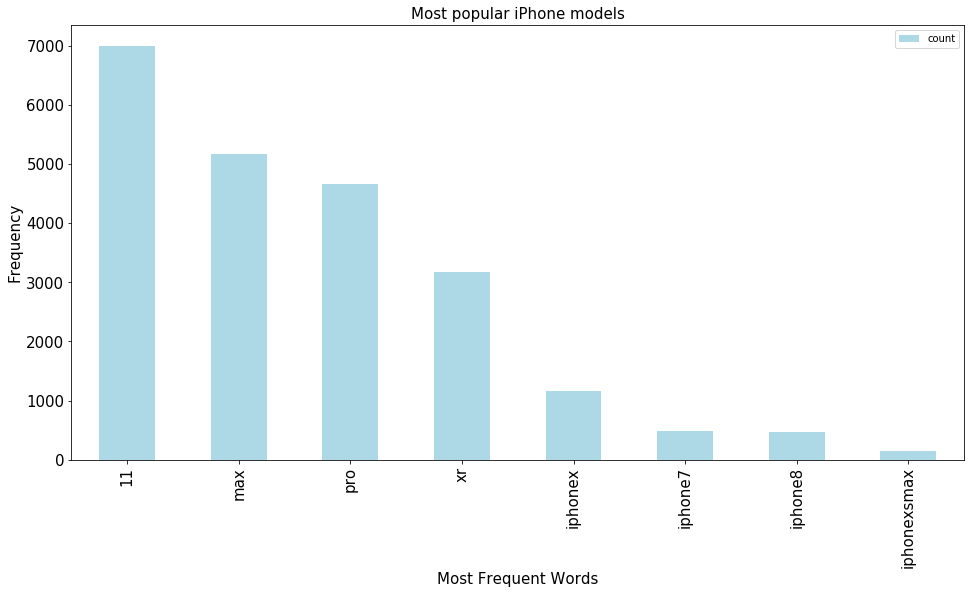

In [16]:
a=pd.DataFrame(tokens_data.sum(axis=0,skipna=True))
top30=a.rename(columns={0:'count'}).reset_index().rename(columns={'index':'word'}).sort_values(by='count',ascending=False)

list_iphone = ['11','xs','pro','max','iphonex','xr','x','iphone7','iphone8','iphone8plus','iphonexsmax']
top30[top30['word'].isin(list_iphone)].plot(y='count',x='word',kind='bar',color='lightblue',figsize=(16,8),fontsize = 15)
plt.xlabel('Most Frequent Words',fontsize = 15);
plt.ylabel('Frequency',fontsize = 15)
plt.title('Most popular iPhone models', fontsize = 15)

### Sentiment Analysis using Text Blob

In [174]:
data2['sentiment'] = data2['correcttext'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
data2[['correcttext','sentiment']].head()

,correcttext,sentiment
0,drop news give away free phone 11 february ent...,0.60
1,enter skint phone 11 giveaway chance win brand...,0.47
2,enter chance win phone 11 256gb airposts speci...,0.58
3,okay new phone 11 pro really good video shit b...,0.40
4,know brood phone11,0.00


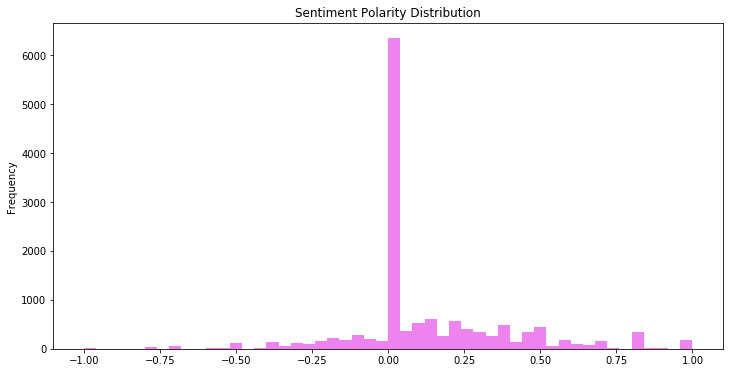

In [175]:
data2['sentiment'].plot(
    kind='hist',
    bins=50,
    title='Sentiment Polarity Distribution',
    figsize=(12,6),
    color = 'violet');

In [176]:
data2['sentiment_value'] = 0
data2['sentiment_value'][data2['sentiment']>0] = 'Positive'
data2['sentiment_value'][data2['sentiment']==0] = 'Neutral'
data2['sentiment_value'][data2['sentiment']<0] = 'Negative'

In [177]:
data2[['cleantext','sentiment_value']].head(10)

,cleantext,sentiment_value
0,idrop news is giving away a free iphone 11 in ...,Positive
1,i entered skinit s iphone 11 giveaway for a ch...,Positive
2,enter for your chance to win an iphone 11 256g...,Positive
3,okay the new iphone 11 pro is really good at v...,Positive
4,you know it brooo iphone11,Neutral
5,nyc iphone 11 pro max dope pic twitter com zwv...,Neutral
6,all i want for christmas is iphone 11 haha,Positive
7,i would love to win or own an iphone 11 or any...,Positive
8,could the apple card be the key to iphone 11 s...,Neutral
9,no offense but tener un iphone 11 actually suc...,Neutral


Text(0.5, 1.0, 'Distribution of Sentiments of tweets on iPhone')

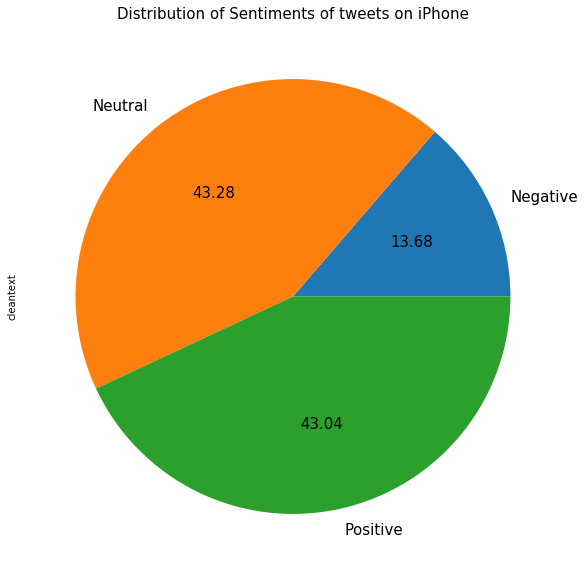

In [178]:
data2.groupby(['sentiment_value'])['cleantext'].count().plot.pie(figsize = (16,10),fontsize = (15),autopct='%.2f')
plt.title('Distribution of Sentiments of tweets on iPhone',fontsize = 15)

### Tokenization and POS-Tagging

In [179]:
#tagged_sentence = nltk.tag.pos_tag(data['text'].split())
texts = data2['correcttext'].tolist()

In [180]:
# Creating tokens
data2['tokens'] = data2['correcttext'].apply(lambda x : nltk.word_tokenize(x))

In [181]:
# Creating POS Tags
data2['pos_tags'] = data2['tokens'].apply(lambda x : nltk.pos_tag(x))

In [184]:
#POS TAGS REMOVAL (NOUNS)
for i in data2.index:
    for j in range(1,len(data2.at[i,'pos_tags'])):
            tag = data2.at[i,'pos_tags'][j][1]
            word = data2.at[i,'pos_tags'][j][0]
            if((tag in ['NN','NNPS','PRP','PRP$','FW','IN','MD','WP','WDT',]) & (word in data2.at[i,'tokens'])):               
                x = data2.at[i,'tokens'].remove(word)

In [185]:
# Separating Nouns, Verbs, Adverbs and Geo Tags
data2['NN'] = ''
data2['JJ'] = ''
data2['VB'] = ''
data2['GEO'] = ''

def tweet_ner(chunker):
    treestruct = ne_chunk(pos_tag(word_tokenize(chunker)))
    entitynn = []
    entityjj = []
    entityg_air = []
    entityvb = []
    for y in str(treestruct).split('\n'):
        if 'GPE' in y or 'GSP' in y:
            entityg_air.append(y)
        elif '/VB' in y:
            entityvb.append(y)
        elif '/NN' in y:
            entitynn.append(y)
        elif '/JJ' in y:
            entityjj.append(y)
    stringnn = ''.join(entitynn)
    stringjj = ''.join(entityjj)
    stringvb = ''.join(entityvb)
    stringg = ''.join(entityg_air)
    return stringnn, stringjj, stringvb, stringg

In [186]:
i = 0
for x in data2['correcttext']:
    entitycontainer = tweet_ner(x)
    data2.at[i,'NN'] = entitycontainer[0]
    data2.at[i,'JJ'] = entitycontainer[1]
    data2.at[i,'VB'] = entitycontainer[2]
    data2.at[i,'GEO'] = entitycontainer[3]
    i += 1

In [187]:
for i in data2.head(10).index:
    data2['NN']=data2['NN'].apply(lambda x: ",".join(word for word in x.split('/NN')))
    data2['JJ']=data2['JJ'].apply(lambda x: ",".join(word for word in x.split('/JJ')))
    data2['VB']=data2['VB'].apply(lambda x: ",".join(word for word in x.split('/VB')))

data2[['pos_tags','NN','JJ','VB']].head()

,pos_tags,NN,JJ,VB
0,"[(drop, NN), (news, NN), (give, VB), (away, RP...","drop, news, phone, enter, nr, rmmfks,)","free, february,","give, win,P"
1,"[(enter, NN), (skint, NN), (phone, NN), (11, C...","enter, skint, phone, giveaway, chance, ...","new, pro, gray,","win,P"
2,"[(enter, NN), (chance, NN), (win, VBP), (phone...","enter, chance, phone, airposts,S edition...","special, pad, stacksocial,","win,P gid,P"
3,"[(okay, JJ), (new, JJ), (phone, NN), (11, CD),...","phone, video, day,","okay, new, pro, good, shit, beautiful,",
4,"[(know, VB), (brood, NN), (phone11, NN)]",,,"(S know, brood/NN phone11/NN)"


### Analyzing Nouns, Verbs & Adjectives 

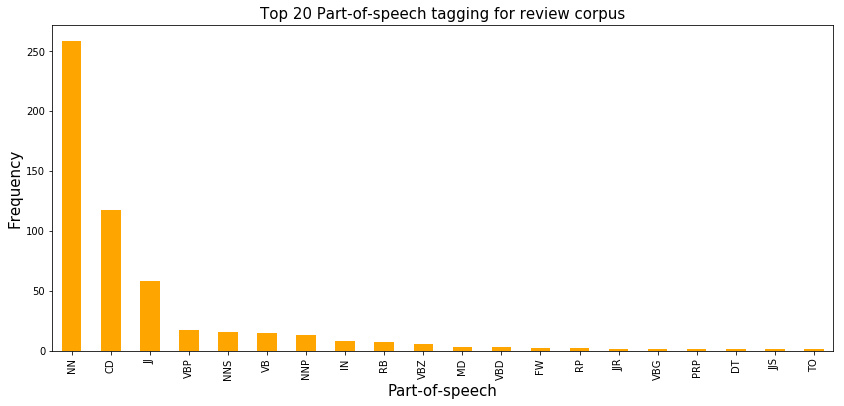

In [188]:
blob = TextBlob(str(data2['correcttext']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(
    kind='bar', 
    title='Top 20 Part-of-speech tagging for review corpus',
    figsize = (14,6),
    color = 'orange');
plt.xlabel('Part-of-speech',fontsize = 15);
plt.ylabel('Frequency',fontsize = 15);
plt.title('Top 20 Part-of-speech tagging for review corpus', fontsize = 15);

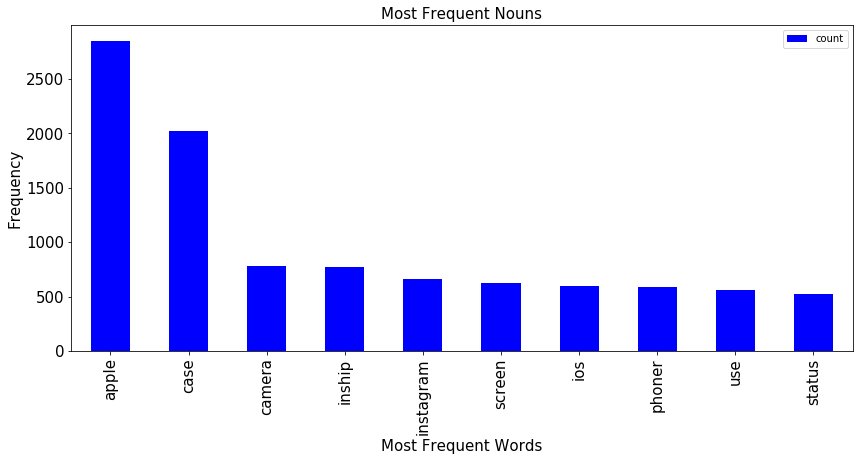

In [191]:
vectorizer = CountVectorizer()
tokens_data_NN = pd.DataFrame(vectorizer.fit_transform(data2['NN']).toarray(), columns=vectorizer.get_feature_names())
a=pd.DataFrame(tokens_data_NN.sum(axis=0,skipna=True))
x = a.rename(columns={0:'count'}).reset_index().rename(columns={'index':'word'}).sort_values(by='count',ascending=False)

list_iphone = ['11','xs','pro','max','iphonex','xr','x','iphone7','iphone8','iphone8plus','iphonexsmax','iphon','com','http'
              ,'twitter','phone','appl','www','jj','cd','plu','igshid','iphonexr']
x[~x['word'].isin(list_iphone)].head(10).plot(y='count',x='word',kind='bar',color='blue',figsize=(14,6),fontsize = 15)
plt.xlabel('Most Frequent Words',fontsize = 15);
plt.ylabel('Frequency',fontsize = 15);
plt.title('Most Frequent Nouns', fontsize = 15);

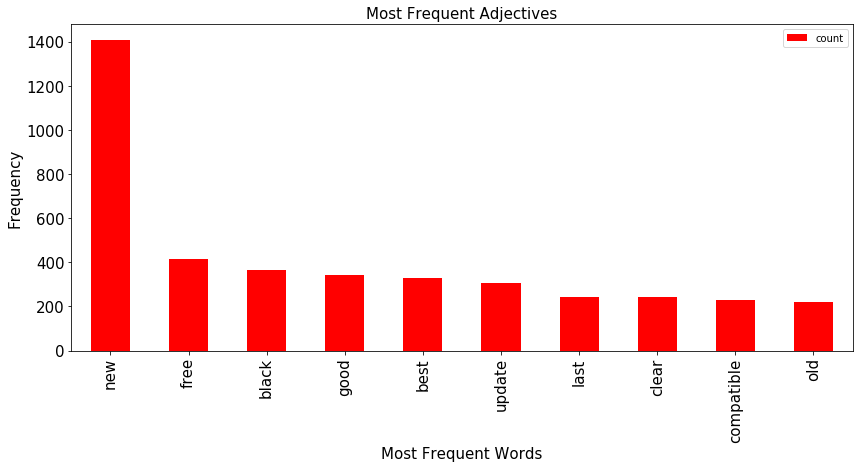

In [193]:
vectorizer = CountVectorizer()
tokens_data_JJ = pd.DataFrame(vectorizer.fit_transform(data2['JJ']).toarray(), columns=vectorizer.get_feature_names())
b=pd.DataFrame(tokens_data_JJ.sum(axis=0,skipna=True))
x1 = b.rename(columns={0:'count'}).reset_index().rename(columns={'index':'word'}).sort_values(by='count',ascending=False)

list_iphone = ['http','appl','iphon','pro','iphone11pro','utm','iphone11','ly','gray']
x1[~x1['word'].isin(list_iphone)].head(10).plot(y='count',x='word',kind='bar',color='red',figsize=(14,6),fontsize = 15)
plt.xlabel('Most Frequent Words',fontsize = 15);
plt.ylabel('Frequency',fontsize = 15);
plt.title('Most Frequent Adjectives', fontsize = 15);

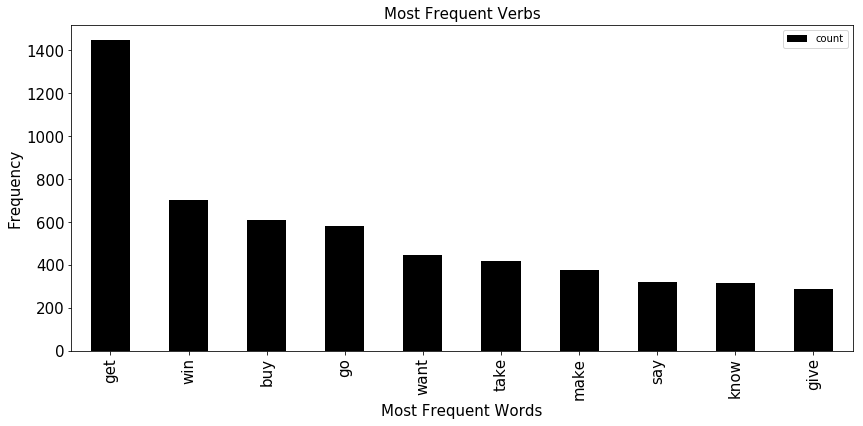

In [194]:
vectorizer = CountVectorizer()
tokens_data_VB = pd.DataFrame(vectorizer.fit_transform(data2['VB']).toarray(), columns=vectorizer.get_feature_names())
c=pd.DataFrame(tokens_data_VB.sum(axis=0,skipna=True))
y = c.rename(columns={0:'count'}).reset_index().rename(columns={'index':'word'}).sort_values(by='count',ascending=False)

list_iphone = ['11','xs','pro','max','iphonex','xr','x','iphone7','iphone8','iphone8plus','iphonexsmax','iphon','com','http'
              ,'twitter','phone','appl','www','jj','cd','plu','igshid','iphonexr','nn','nnp','io']
y[~y['word'].isin(list_iphone)].head(10).plot(y='count',x='word',kind='bar',color='black',figsize=(14,6),fontsize = 15)
plt.xlabel('Most Frequent Words',fontsize = 15);
plt.ylabel('Frequency',fontsize = 15);
plt.title('Most Frequent Verbs', fontsize = 15);

### WORD Clouds

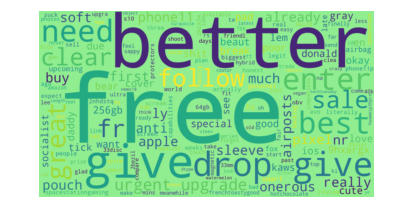

In [204]:
# Create and generate a word cloud image:
stopwords =  set(STOPWORDS)
stopwords.update(['iphone','11','xs','max','pro','iphon','xr','appl','new','win','phone','iphonepro','february','away'])

wc = WordCloud(stopwords = stopwords,max_words = 500,width=1800,height=1000,background_color="lightgreen").generate(str(data2['tokens'][data2['sentiment_value']=='Positive']))

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.margins(x=10, y=10) 
plt.show()

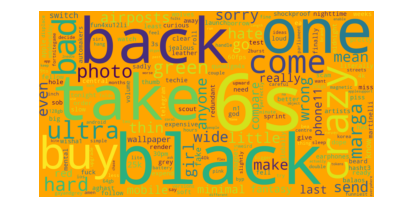

In [213]:
# Create and generate a word cloud image:
stopwords =  set(STOPWORDS)
stopwords.update(['iphone','11','xs','max','pro','iphon','xr','appl','new','win','phone'])

wc = WordCloud(stopwords = stopwords,max_words = 300,width=1800,height=1000,background_color="orange").generate(str(data2['tokens'][data2['sentiment_value']=='Negative']))

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.margins(x=10, y=10) 
plt.show()

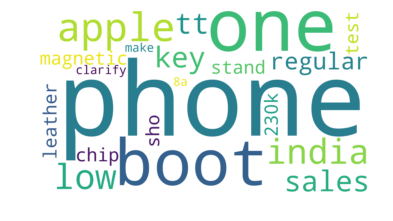

In [206]:
# Create and generate a word cloud image:
stopwords =  set(STOPWORDS)
stopwords.update(['iphone','11','xs','max','pro','iphon','xr','appl','new','win','256gb','64gb'])

wc = WordCloud(stopwords = stopwords,max_words = 20,width=1800,height=1000,background_color="white").generate(str(data2['tokens'][data2['sentiment_value']=='Neutral']))

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.margins(x=10, y=10) 
plt.show()

### TEXT Topics - NMF Method

In [207]:
tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')
doc_term_matrix2 = tfidf_vect.fit_transform(data2['correcttext'].values.astype('U'))
nmf = NMF(n_components=5, random_state=42)
nmf.fit(doc_term_matrix2)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=5, random_state=42, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [208]:
first_topic = nmf.components_[0]
top_topic_words = first_topic.argsort()[-10:]

for i in top_topic_words:
    print(tfidf_vect.get_feature_names()[i])

like
apple
new
buy
status
want
camera
max
pro
11


In [209]:
second_topic = nmf.components_[1]
top_topic_words = second_topic.argsort()[-10:]

for i in top_topic_words:
    print(tfidf_vect.get_feature_names()[i])

gold
256gb
12
cover
status
6s
plus
case
max
xs


In [210]:
third_topic = nmf.components_[2]
top_topic_words = third_topic.argsort()[-10:]

for i in top_topic_words:
    print(tfidf_vect.get_feature_names()[i])

11
new
brand
skint
gray
io
chance
giveaway
enter
win
